In [4]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np 

from tqdm import tqdm
from sklearn.model_selection import KFold

In [5]:
train_images = []
train_labels = []


for chunk in tqdm(pd.read_csv('emnist-bymerge-train.csv', header=None, chunksize=1000), desc="Reading CSV in chunks"):
    train_labels.extend(chunk[0].values)  
    train_images.extend(chunk.drop(columns=[0]).values)  


train_images = np.array(train_images)
train_labels = np.array(train_labels)



Reading CSV in chunks: 698it [00:39, 17.88it/s]


In [7]:
train_images[39].shape

(784,)

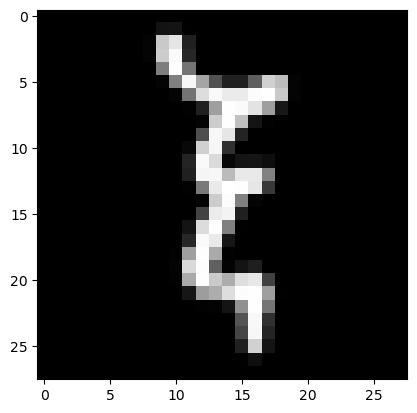

In [9]:
plt.imshow(train_images[39].reshape(28,28), cmap='gray')

In [11]:
feature, hog_img = hog(train_images[39].reshape(28,28), orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2),
                       visualize=True, block_norm='L2')

In [15]:
n_dims = feature.shape[0]
n_samples = train_images.shape[0]

In [17]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [20]:
for i in tqdm(range(n_samples), desc="Processing data"):
    X_train[i], _ = hog(train_images[i].reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

Processing data: 100%|████████████████████████████████████████████████████████| 697932/697932 [15:30<00:00, 750.08it/s]


In [28]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_train)
y_train_one_hot = lb.transform(y_train)

In [30]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    hidden_layer_sizes=(128, 64, 10),
    solver='adam',
    learning_rate_init=0.005,
    batch_size=512,
    max_iter=100,
    early_stopping=True,
    validation_fraction=0.1
)
clf.fit(X_train, y_train_one_hot)

MLPClassifier(batch_size=512, early_stopping=True,
              hidden_layer_sizes=(128, 64, 10), learning_rate_init=0.005,
              max_iter=100)

In [34]:

test_images = []
test_labels = []


for chunk in tqdm(pd.read_csv('emnist-bymerge-test.csv', header=None, chunksize=1000), desc="Reading CSV in chunks"): 
    test_labels.extend(chunk[0].values) 
    test_images.extend(chunk.drop(columns=[0]).values)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

Reading CSV in chunks: 117it [00:06, 19.33it/s]


In [40]:
n_samples = test_images.shape[0]
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)
for i in tqdm(range(n_samples), desc="Processing data"):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

Processing data: 100%|████████████████████████████████████████████████████████| 116323/116323 [02:34<00:00, 750.72it/s]


In [46]:
y_test_one_hot = lb.transform(y_test)
y_pred_one_hot = clf.predict(X_test)
y_pred = lb.inverse_transform(y_pred_one_hot)

In [50]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)


In [52]:
from mlxtend.plotting import plot_confusion_matrix
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',  
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z', 
    'a', 'b','d', 'e', 'f', 'g', 'h', 'n',  'q', 'r', 't'
    
]

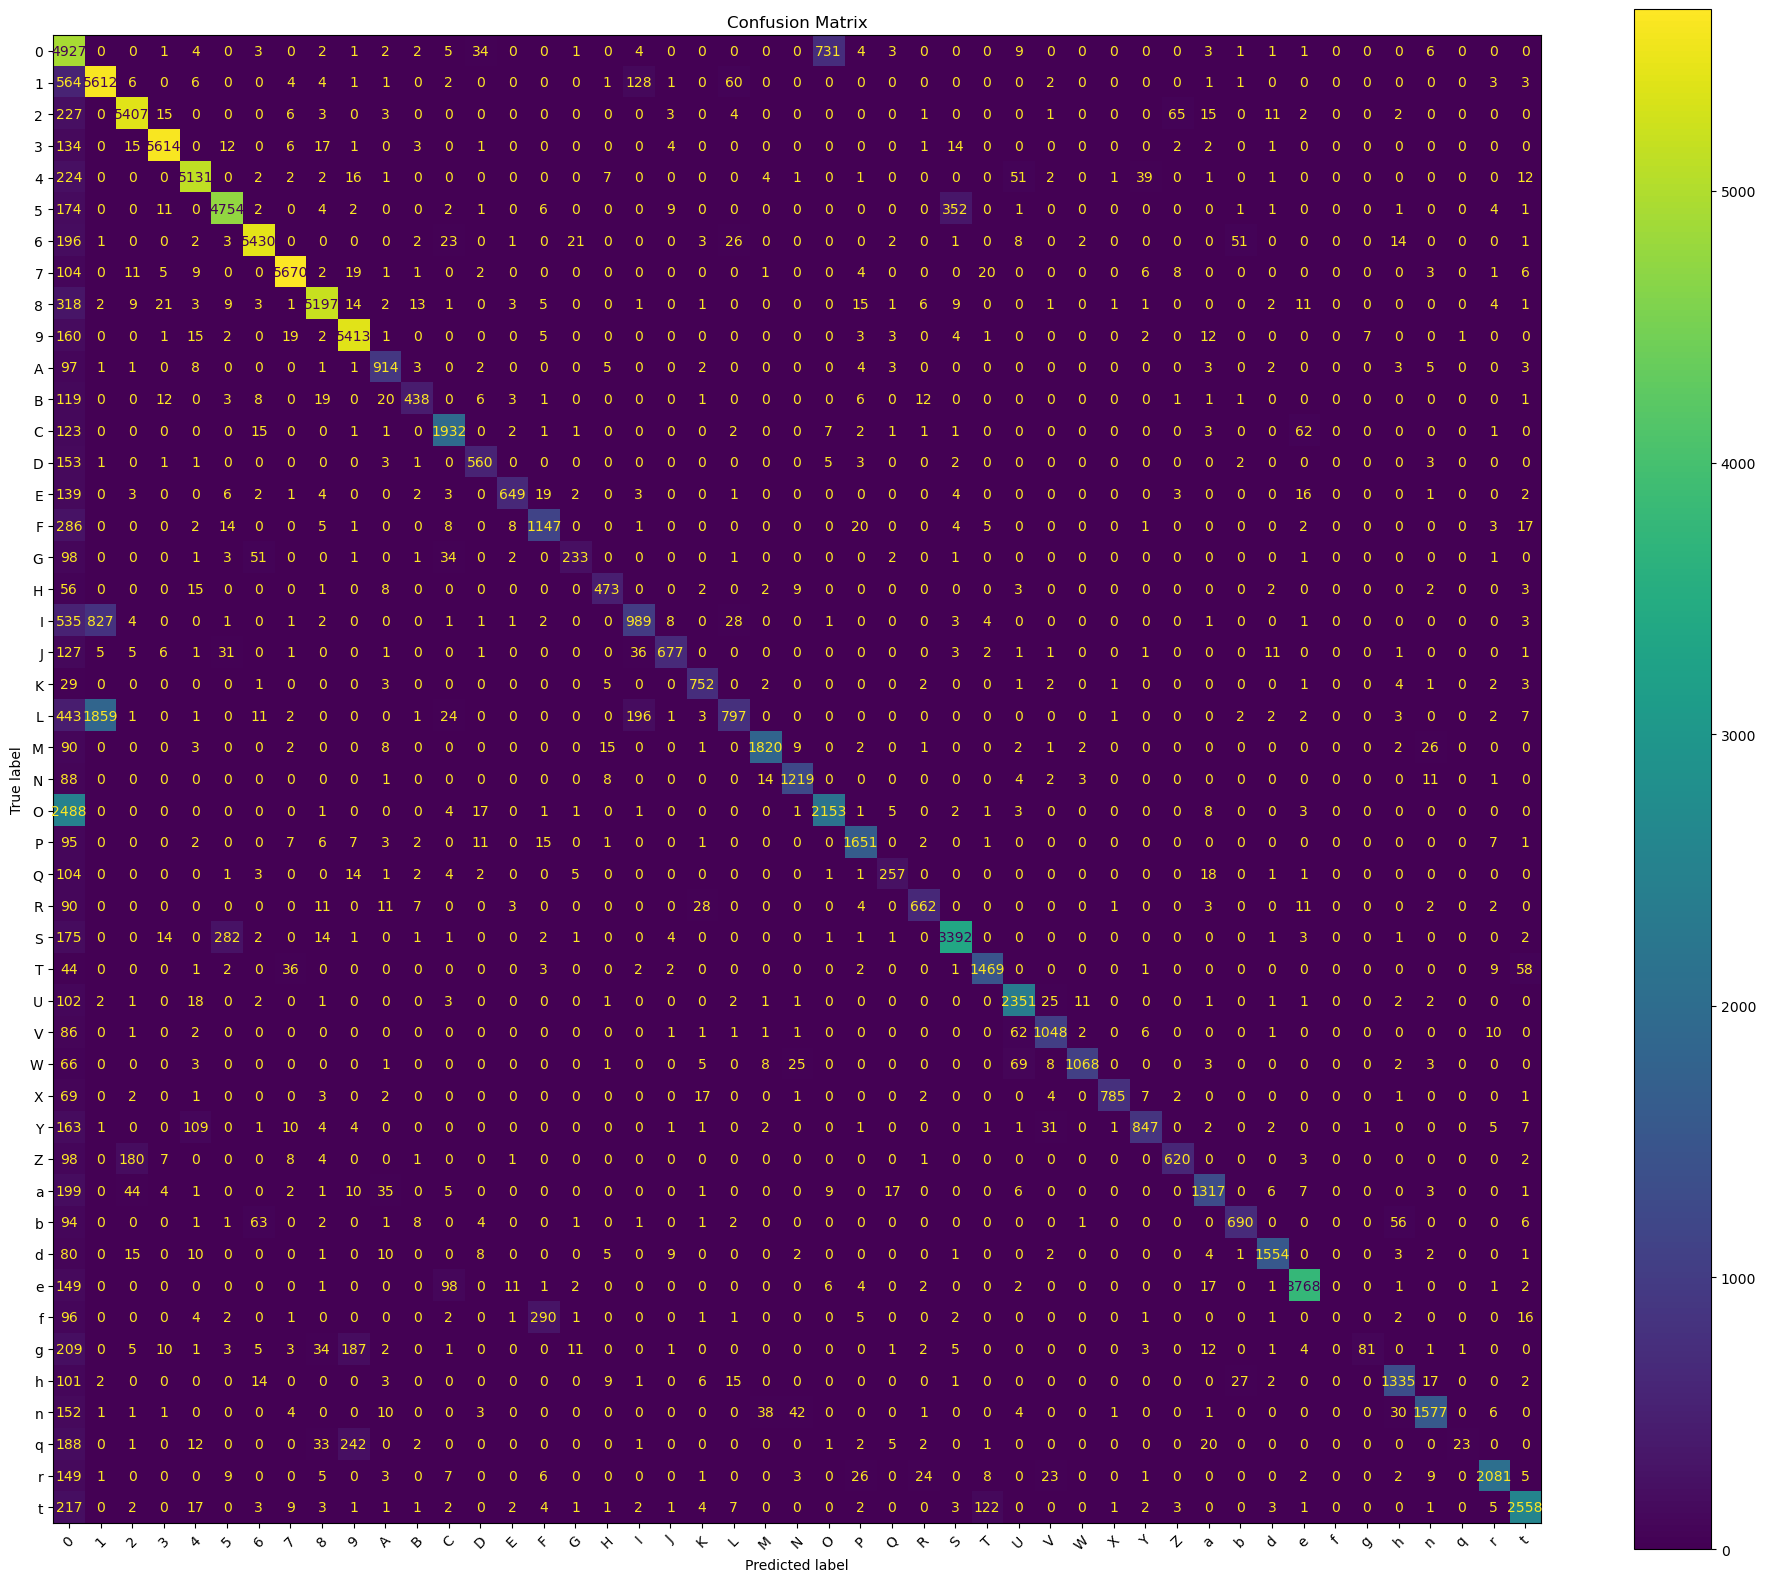

In [54]:
fig, ax = plt.subplots(figsize=(24, 20))
ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_names).plot(ax=ax)
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

## 1. Precission

In [73]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
precision

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.33688889, 0.67492483, 0.94627231, 0.98095405, 0.95300892,
       0.92526275, 0.96602028, 0.97842968, 0.96437187, 0.91173994,
       0.8679962 , 0.89205703, 0.89361702, 0.8575804 , 0.94468705,
       0.76061008, 0.82918149, 0.88909774, 0.72401171, 0.93767313,
       0.90384615, 0.84160507, 0.96143687, 0.92770167, 0.73859348,
       0.93594104, 0.8538206 , 0.91689751, 0.89145861, 0.89847095,
       0.91194725, 0.90893322, 0.98071625, 0.98991173, 0.92265795,
       0.88068182, 0.90953039, 0.88803089, 0.96641791, 0.96541122,
       0.        , 0.91011236, 0.9112628 , 0.94149254, 0.92      ,
       0.96880819, 0.93837124])

## 2. Recall

In [78]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
recall

array([0.85761532, 0.876875  , 0.93790113, 0.96344603, 0.93324845,
       0.89260233, 0.93831001, 0.96543504, 0.91900973, 0.95788356,
       0.86389414, 0.67177914, 0.8961039 , 0.76190476, 0.75465116,
       0.75262467, 0.54186047, 0.82118056, 0.40986324, 0.74232456,
       0.92954265, 0.23734366, 0.91733871, 0.9022946 , 0.45906183,
       0.9111479 , 0.61927711, 0.79281437, 0.86996666, 0.90122699,
       0.92998418, 0.85690924, 0.84627575, 0.87513935, 0.70878661,
       0.67027027, 0.78956835, 0.74034335, 0.90983607, 0.9267093 ,
       0.        , 0.13893654, 0.86970684, 0.84241453, 0.04315197,
       0.87991543, 0.85867741])

## 3. Akurasi

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8342460218529439

## 4. F1 Score

In [83]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
f1

0.7923885657163657